# CTCF L pos & neg (5%) | rle & kmer features

CTCF_L pos & neg motifs
* mokapot
    * res: (238,349)
    * fibers
        * merged: CTCF_100bp_L_5_v2.mokapot.m6a_fiberseq.txt (13,062,453)
        * pos flanking 100bp: CTCF_m6a_fiberseq_L_100bp_positive-cleaned_100bp.txt (9,495,739)
        * neg flanking 100bp: CTCF_m6a_fiberseq_L_100bp_small_5_negative-cleaned_100bp.txt (8,040,195)
* feature files
    * pin: CTCF_m6a_fiberseq_L_100bp_features-v2.pin (569,889 motif-query combined)
    * pos: CTCF_m6a_fiberseq_L_100bp_positive_features-v2.txt (238,349 motif-query)
    * neg: CTCF_m6a_fiberseq_L_100bp_small_5_negative_features-v2.txt (331,543 motif-query)
* fiberseq files:
    * pos: CTCF_m6a_fiberseq_L_100bp_positive.txt (12,739,713 observations)
    * neg: CTCF_m6a_fiberseq_L_100bp_small_5_negative.txt (39,485,335 observations)

In [3]:
library(ggplot2)
library(data.table)
library(plyr)
library(dplyr)
library(tictoc)
library(ggsci)
library(purrr)
library(scales)

In [4]:
while (!is.null(dev.list()))  dev.off()
rm(list=ls())

#------------ Helper Functions ------------
# Initiate PDF
openPDF <- function (output_file_fh, pdf_dims) {
  print(sprintf("Saving plots to: %s", output_file_fh))
  # Open PDF
  pdf(output_file_fh, width = pdf_dims[1], height = pdf_dims[2],
      useDingbats=FALSE, family = "ArialMT")
}

# Close PDF
closePDF <- function () {
  while (!is.null(dev.list()))  dev.off()
  print("File saved.")
}

In [5]:
#------------ Define dirs ------------
setwd("/mmfs1/gscratch/stergachislab/mwperez/ctcf-footprinting")

#ARGS
data_folder <- sprintf("%s/candidate_footprints", getwd())
mokapot_dir <- sprintf("%s/mokapot_res", getwd())
output_folder <- sprintf("%s/figures", mokapot_dir)

# formatting data

In [6]:
# set args
motif_type <- "L"
input_file_root <- "100bp_L_5_v2"
file_root <- "100bp_L_rle_kmer" # for output file & titles
ctcf_dist <- c(-100,100)
n_rows <- Inf

# load set data file
data_file_name <- sprintf("CTCF_%s.mokapot.m6a_fiberseq.txt", input_file_root)
data_file <- sprintf("%s/%s", mokapot_dir, data_file_name)
print(data_file)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/CTCF_100bp_L_5_v2.mokapot.m6a_fiberseq.txt"


In [7]:
# read table
df <- fread(data_file, nrows=n_rows)
sprintf("m6a rows: %s", format(dim(df)[1], big.mark=",", scientific=FALSE))

# filter centered_position_type for m6a
df <- filter(df, centered_position_type == "m6a")
sprintf("m6a rows: %s", format(dim(df)[1], big.mark=",", scientific=FALSE))

[1] "m6a rows: 17,535,934"

[1] "m6a rows: 17,535,934"

In [362]:
df <- df %>%
    mutate(Label = ifelse(Label == 1, "Positive", "Negative"))

table(df$Label)


Negative Positive 
 8040195  9495739 

In [8]:
df$FDR_05 <- ifelse(df$FDR < 0.05, "low_FDR", "high_FDR")
df$FDR_01 <- ifelse(df$FDR < 0.01, "low_FDR", "high_FDR")
df$FDR_001 <- ifelse(df$FDR < 0.001, "low_FDR", "high_FDR")
df$FDR_0001 <- ifelse(df$FDR < 0.0001, "low_FDR", "high_FDR")

In [11]:
table(df$FDR_05)
table(df$FDR_01)
table(df$FDR_001)
table(df$FDR_0001)


high_FDR  low_FDR 
 8734847  8801087 


high_FDR  low_FDR 
10314245  7221689 


high_FDR  low_FDR 
13839002  3696932 


high_FDR  low_FDR 
15823979  1711955 

In [9]:
# unique CTCF motifs, queries, & motif_queries
sprintf("unique motifs: %s", format(length(unique(df$motif_name)), big.mark=",", scientific=FALSE))
sprintf("unique queries: %s", format(length(unique(df$query_name)), big.mark=",", scientific=FALSE))
sprintf("unique motif-query groups: %s", format(length(unique(df$motif_query)), big.mark=",", scientific=FALSE))

[1] "unique motifs: 260,946"

[1] "unique queries: 411,235"

[1] "unique motif-query groups: 569,891"

In [10]:
df_og <- df

In [366]:
table(df$Label)


Negative Positive 
 8040195  9495739 

## m6a fiberseq density plots

### grouped pos & neg sets

In [99]:
#------------ Set output file ------------
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_fiberseq_density-all.pdf", file_root)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file
save_pdf <- TRUE
pdf_dims <- c(10,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/figures/CTCF_100bp_L_rle_kmer.mokapot.m6a_fiberseq_density-all.pdf"


In [19]:
# get plot max
density(df$centered_start)
max(density(df$centered_start)$y)


Call:
	density.default(x = df$centered_start)

Data: df$centered_start (17535934 obs.);	Bandwidth 'bw' = 1.521

       x                 y            
 Min.   :-104.56   Min.   :4.778e-06  
 1st Qu.: -52.28   1st Qu.:3.059e-03  
 Median :   0.00   Median :5.098e-03  
 Mean   :   0.00   Mean   :4.777e-03  
 3rd Qu.:  52.28   3rd Qu.:6.751e-03  
 Max.   : 104.56   Max.   :8.417e-03  

[1] 0.008417369

In [100]:
# create density plot
font_size <- 12
font_info <- element_text(size=font_size, family="ArialMT", color="black")

plot_title <- sprintf("CTCF m6a density merged pos & neg data\n%s | feature type(s): rle & kmers | m6As: %s", 
                      "Pos & 5% L neg", format(nrow(df), big.mark=",", scientific=FALSE))
x_axis_name <- "distance from CTCF start (bp)"
y_axis_name <- "aggregate m6a methylation density"

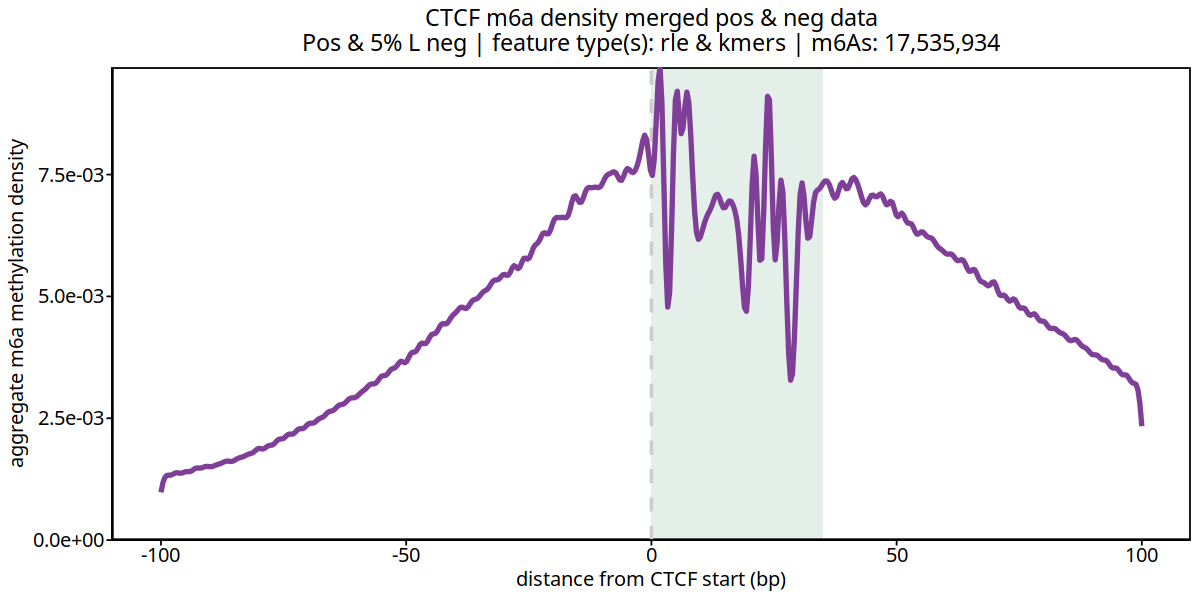

In [101]:
# define colors (light grey, purple, darker grey, blue)
vline_col <- "#CECDCC"
m6a_col <- "#7F3F98"
fiber_col <- "#D1D2D4"
# light green
motif_annot_col <- "#006738"#"#6C9272"#"blue"
# colors from Mitchell's presentation (orange, red, purple, light grey, navy (gene track))
mitch_cols <- c("#FF8C00", "#FF0000", "#9370DB", "#E6E6E6", "#0C0C78")
# neg, high m6A & no TF: blue | pos, no m6A & TF: red
color_vals <- c(mitch_cols[5], mitch_cols[2])

# set plot size
options(repr.plot.width=pdf_dims[1], repr.plot.height=pdf_dims[2])


p <- ggplot(df, aes(x=centered_start)) +
    # add box over motif location
    annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.1, fill=motif_annot_col) +
    # add vertical line at x=0
    geom_vline(xintercept=0, color=vline_col, show.legend=FALSE, linetype="dashed", linewidth=1) +
    # density plot
    geom_density(col=m6a_col, size=1.5, adjust=0.5) +
    
    ggtitle(plot_title) +
    scale_y_continuous(limits=y_limits, expand=expansion(mult=c(0,0)), name=y_axis_name,
                       labels = function(x) format(x, scientific=TRUE), guide=guide_axis(check.overlap=TRUE)) +
    scale_x_continuous(name=x_axis_name, limits=x_limits) +
    theme_classic() +
    theme(text = font_info,
          axis.ticks = element_line(color="#000000", lineend="square"),
          axis.text = font_info,
          panel.background = element_rect(fill="transparent", color="#000000", size=1),
          plot.title = element_text(family="ArialMT", size=font_size+2, hjust=0.5))
p

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])
}

__postitive vs negative__

In [102]:
#------------ Set output file ------------
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_fiberseq_density-pos_v_neg.pdf", file_root)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file
save_pdf <- TRUE
pdf_dims <- c(10,5)
     

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/figures/CTCF_100bp_L_rle_kmer.mokapot.m6a_fiberseq_density-pos_v_neg.pdf"


In [103]:
# set y-lim
y_limits <- c(0, NA)#round_any(max(density(df$centered_start)$y)*1.2, 0.001, f=ceiling))
x_limits <- c(-100, 100)

plot_title <- sprintf("CTCF m6a density pos vs negative sets\n%s | rle & kmers | m6A pos: %s | m6A neg: %s", 
                      "Pos & 5% L neg",
                      format(table(df$Label)["Positive"], big.mark=",", scientific=FALSE), 
                      format(table(df$Label)["Negative"], big.mark=",", scientific=FALSE))
x_axis_name <- "distance from CTCF start (bp)"
y_axis_name <- "aggregate m6a methylation density"

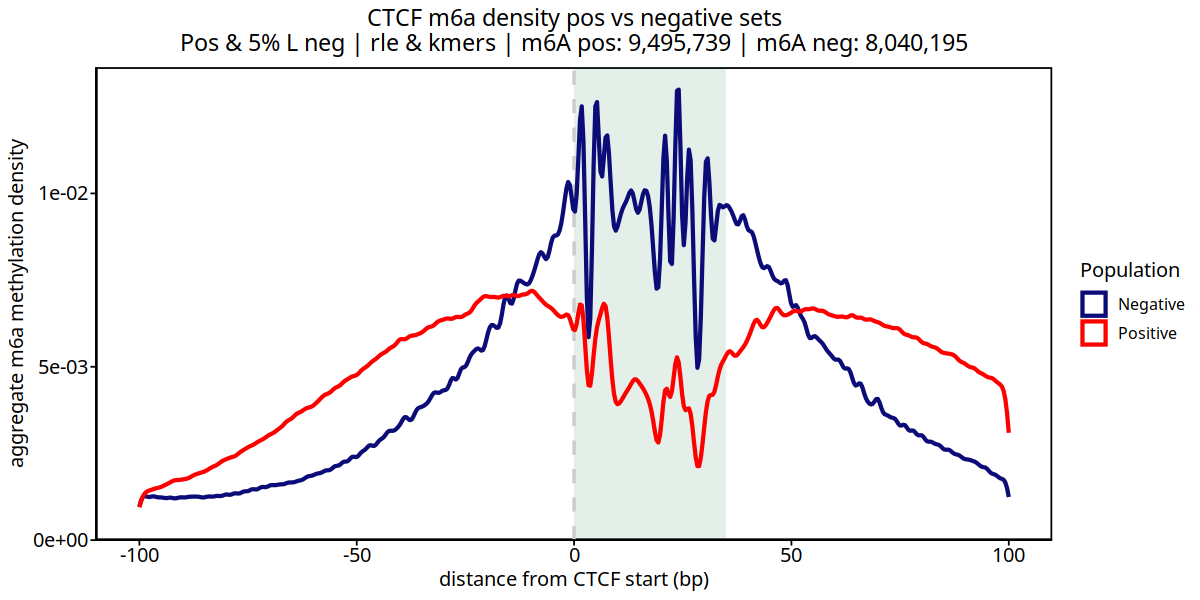

In [104]:
# define colors (light grey, purple, darker grey, blue)
vline_col <- "#CECDCC"
m6a_col <- "#7F3F98"
fiber_col <- "#D1D2D4"
# light green
motif_annot_col <- "#006738"#"#6C9272"#"blue"
# colors from Mitchell's presentation (orange, red, purple, light grey, navy (gene track))
mitch_cols <- c("#FF8C00", "#FF0000", "#9370DB", "#E6E6E6", "#0C0C78")
# neg, high m6A & no TF: blue | pos, no m6A & TF: red
color_vals <- c(mitch_cols[5], mitch_cols[2])

# set plot size
options(repr.plot.width=pdf_dims[1], repr.plot.height=pdf_dims[2])

p <- ggplot(df, aes(x=centered_start, group=Label)) +
    # add box over motif location
    annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.1, fill=motif_annot_col) +
    # add vertical line at x=0
    geom_vline(xintercept=0, color="#CECDCC", show.legend=FALSE, linetype="dashed", linewidth=1) +
    # density plot
    geom_density(aes(col=Label), size=1.2, adjust=0.5) +
    # red, blue
    scale_color_manual(name="Population", values=color_vals, labels=c("Negative", "Positive")) +
    scale_y_continuous(limits=c(0, NA), expand=expansion(mult=c(0,0.05)), name=y_axis_name,
                       labels = function(x) format(x, scientific=TRUE), guide=guide_axis(check.overlap=TRUE)) +
    
    ggtitle(plot_title) +
    scale_x_continuous(name=x_axis_name) +
    theme_classic() +
    theme(text = font_info,
          axis.ticks = element_line(color="#000000", lineend="square"),
          axis.text = font_info,
          panel.background = element_rect(fill="transparent", color="#000000", size=1),
          plot.title = element_text(family="ArialMT", size=font_size+2, hjust=0.5))
p

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])
}

### Pos data (FDR filt)

In [106]:
#------------ Set output file ------------
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_fiberseq_density-pos_FDR.pdf", file_root)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file?
save_pdf <- FALSE
pdf_dims <- c(10,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/figures/CTCF_100bp_L_rle_kmer.mokapot.m6a_fiberseq_density-pos_FDR.pdf"


In [82]:
# filter for positive data
pos <- df[df$Label == "Positive"]

In [84]:
FDR_cols <- c("FDR_05", "FDR_01", "FDR_001", "FDR_0001")

__FDR < 0.05__

In [107]:
#------------ Set output file ------------
FDR <- 0.05
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_fiberseq_density-pos_FDR_%s.pdf", file_root, FDR)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file?
save_pdf <- TRUE
pdf_dims <- c(10,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/figures/CTCF_100bp_L_rle_kmer.mokapot.m6a_fiberseq_density-pos_FDR_0.05.pdf"


In [108]:
# set y-lim
y_limits <- c(0, NA)#round_any(max(density(df$centered_start)$y)*1.2, 0.001, f=ceiling))
x_limits <- c(-100, 100)

plot_title <- sprintf("CTCF m6a density pos vs negative sets (FDR < %s)\n%s | rle & kmers | m6A pos: %s | m6A neg: %s", 
                      FDR, "Pos & 5% L neg",
                      format(table(df$FDR_05)["low_FDR"], big.mark=",", scientific=FALSE), 
                      format(table(df$FDR_05)["high_FDR"], big.mark=",", scientific=FALSE))
x_axis_name <- "distance from CTCF start (bp)"
y_axis_name <- "aggregate m6a methylation density"
legend_labels <- c(sprintf("FDR > %s", FDR), sprintf("FDR < %s", FDR))

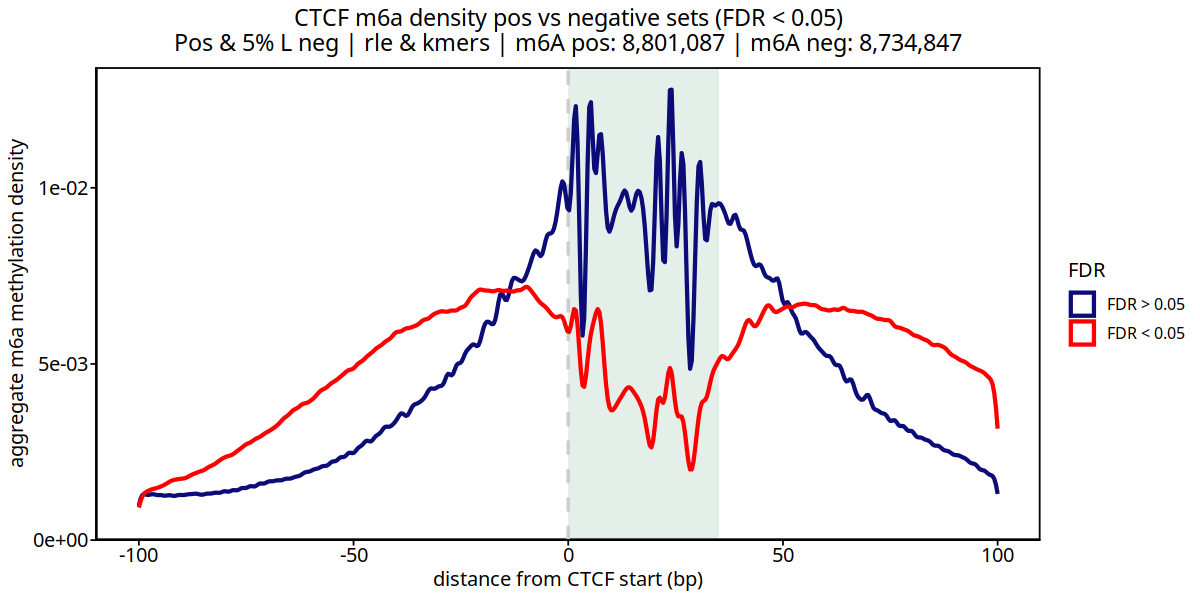

In [109]:
# define colors (light grey, purple, darker grey, blue)
vline_col <- "#CECDCC"
m6a_col <- "#7F3F98"
fiber_col <- "#D1D2D4"
motif_annot_col <- "#006738"#"#6C9272"#"blue"
# colors from Mitchell's presentation (orange, red, purple, light grey, navy (gene track))
mitch_cols <- c("#FF8C00", "#FF0000", "#9370DB", "#E6E6E6", "#0C0C78")
# neg, high m6A & no TF: blue | pos, no m6A & TF: red
color_vals <- c(mitch_cols[5], mitch_cols[2])

# set plot size
options(repr.plot.width=pdf_dims[1], repr.plot.height=pdf_dims[2])

p <- ggplot(df, aes(x=centered_start, group=FDR_05)) +
    # add box over motif location
    annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.1, fill=motif_annot_col) +
    # add vertical line at x=0
    geom_vline(xintercept=0, color="#CECDCC", show.legend=FALSE, linetype="dashed", linewidth=1) +
    # density plot
    geom_density(aes(col=FDR_05), size=1.2, adjust=0.5) +
    # red, blue
    scale_color_manual(name="FDR", values=color_vals, labels=legend_labels) +
    scale_y_continuous(limits=c(0, NA), expand=expansion(mult=c(0,0.05)), name=y_axis_name,
                       labels = function(x) format(x, scientific=TRUE), guide=guide_axis(check.overlap=TRUE)) +
    
    ggtitle(plot_title) +
    scale_x_continuous(name=x_axis_name) +
    theme_classic() +
    theme(text = font_info,
          axis.ticks = element_line(color="#000000", lineend="square"),
          axis.text = font_info,
          panel.background = element_rect(fill="transparent", color="#000000", size=1),
          plot.title = element_text(family="ArialMT", size=font_size+2, hjust=0.5))
p

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])
}

__FDR < 0.01__

In [120]:
#------------ Set output file ------------
FDR <- 0.01
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_fiberseq_density-pos_FDR_%s.pdf", file_root, FDR)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file?
save_pdf <- TRUE
pdf_dims <- c(10,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/figures/CTCF_100bp_L_rle_kmer.mokapot.m6a_fiberseq_density-pos_FDR_0.01.pdf"


In [121]:
# set y-lim
y_limits <- c(0, NA)#round_any(max(density(df$centered_start)$y)*1.2, 0.001, f=ceiling))
x_limits <- c(-100, 100)

plot_title <- sprintf("CTCF m6a density pos vs negative sets (FDR < %s)\n%s | rle & kmers | m6A pos: %s | m6A neg: %s", 
                      FDR, "Pos & 5% L neg",
                      format(table(df$FDR_01)["low_FDR"], big.mark=",", scientific=FALSE), 
                      format(table(df$FDR_01)["high_FDR"], big.mark=",", scientific=FALSE))
x_axis_name <- "distance from CTCF start (bp)"
y_axis_name <- "aggregate m6a methylation density"
legend_labels <- c(sprintf("FDR > %s", FDR), sprintf("FDR < %s", FDR))

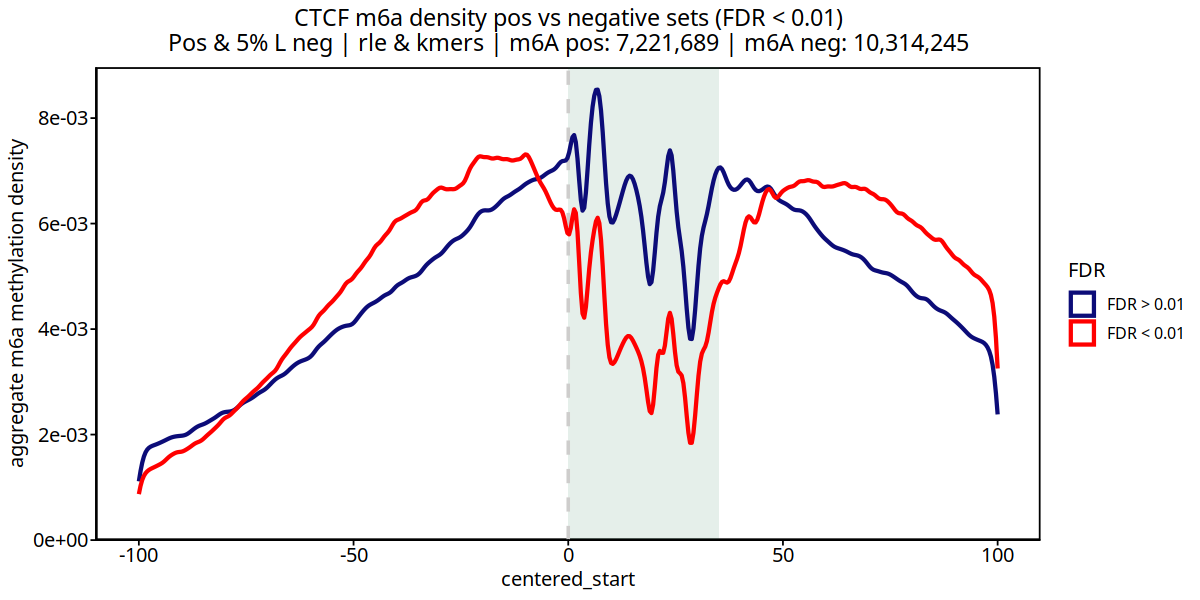

In [122]:
# define colors (light grey, purple, darker grey, blue)
vline_col <- "#CECDCC"
m6a_col <- "#7F3F98"
fiber_col <- "#D1D2D4"
motif_annot_col <- "#006738"#"#6C9272"#"blue"
# colors from Mitchell's presentation (orange, red, purple, light grey, navy (gene track))
mitch_cols <- c("#FF8C00", "#FF0000", "#9370DB", "#E6E6E6", "#0C0C78")
# neg, high m6A & no TF: blue | pos, no m6A & TF: red
color_vals <- c(mitch_cols[5], mitch_cols[2])

# set plot size
options(repr.plot.width=pdf_dims[1], repr.plot.height=pdf_dims[2])

p <- ggplot(pos, aes(x=centered_start, group=FDR_01)) +
    # add box over motif location
    annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.1, fill=motif_annot_col) +
    # add vertical line at x=0
    geom_vline(xintercept=0, color="#CECDCC", show.legend=FALSE, linetype="dashed", linewidth=1) +
    # density plot
    geom_density(aes(col=FDR_01), size=1.2, adjust=0.5) +
    scale_color_manual(name="FDR", values=color_vals, labels=legend_labels) +
    scale_y_continuous(limits=c(0, NA), expand=expansion(mult=c(0,0.05)), name=y_axis_name,
                       labels = function(x) format(x, scientific=TRUE), guide=guide_axis(check.overlap=TRUE)) +
    
    ggtitle(plot_title) +
    theme_classic() +
    theme(text = font_info,
          axis.ticks = element_line(color="#000000", lineend="square"),
          axis.text = font_info,
          panel.background = element_rect(fill="transparent", color="#000000", size=1),
          plot.title = element_text(family="ArialMT", size=font_size+2, hjust=0.5))
p

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])
}

__FDR < 0.001__

In [123]:
#------------ Set output file ------------
FDR <- 0.001
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_fiberseq_density-pos_FDR_%s.pdf", file_root, FDR)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file?
save_pdf <- TRUE
pdf_dims <- c(10,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/figures/CTCF_100bp_L_rle_kmer.mokapot.m6a_fiberseq_density-pos_FDR_0.001.pdf"


In [124]:
# set y-lim
y_limits <- c(0, NA)#round_any(max(density(df$centered_start)$y)*1.2, 0.001, f=ceiling))
x_limits <- c(-100, 100)

plot_title <- sprintf("CTCF m6a density pos vs negative sets (FDR < %s)\n%s | rle & kmers | m6A pos: %s | m6A neg: %s", 
                      FDR, "Pos & 5% L neg",
                      format(table(df$FDR_001)["low_FDR"], big.mark=",", scientific=FALSE), 
                      format(table(df$FDR_001)["high_FDR"], big.mark=",", scientific=FALSE))
x_axis_name <- "distance from CTCF start (bp)"
y_axis_name <- "aggregate m6a methylation density"
legend_labels <- c(sprintf("FDR > %s", FDR), sprintf("FDR < %s", FDR))

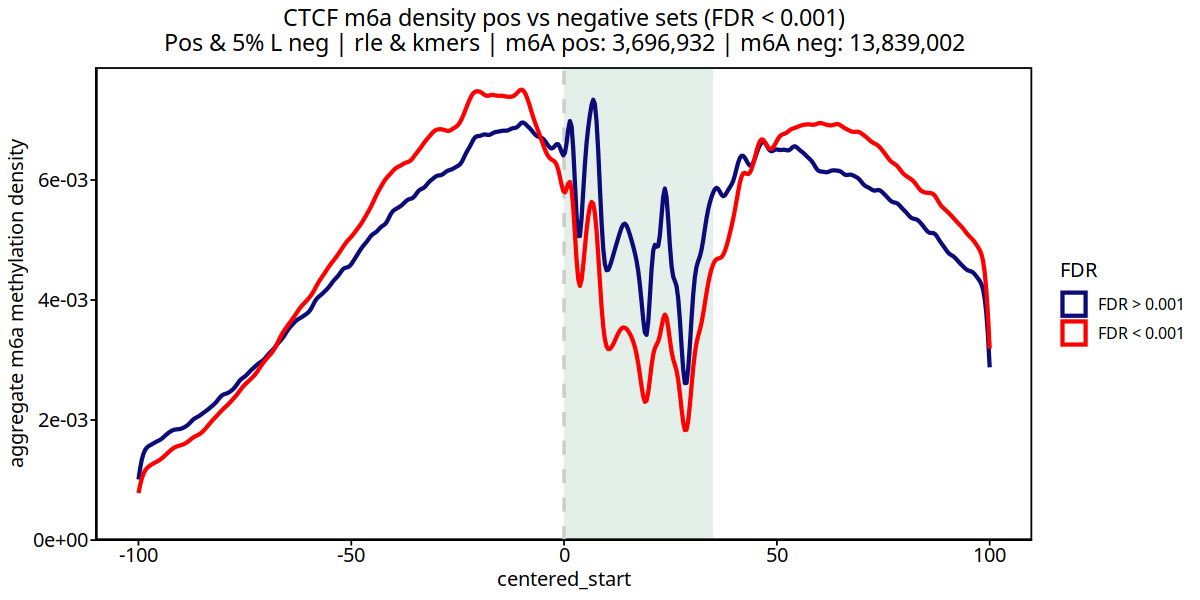

In [125]:
# define colors (light grey, purple, darker grey, blue)
vline_col <- "#CECDCC"
m6a_col <- "#7F3F98"
fiber_col <- "#D1D2D4"
motif_annot_col <- "#006738"#"#6C9272"#"blue"
# colors from Mitchell's presentation (orange, red, purple, light grey, navy (gene track))
mitch_cols <- c("#FF8C00", "#FF0000", "#9370DB", "#E6E6E6", "#0C0C78")
# neg, high m6A & no TF: blue | pos, no m6A & TF: red
color_vals <- c(mitch_cols[5], mitch_cols[2])

# set plot size
options(repr.plot.width=pdf_dims[1], repr.plot.height=pdf_dims[2])


p <- ggplot(pos, aes(x=centered_start, group=FDR_001)) +
    # add box over motif location
    annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.1, fill=motif_annot_col) +
    # add vertical line at x=0
    geom_vline(xintercept=0, color="#CECDCC", show.legend=FALSE, linetype="dashed", linewidth=1) +
    # density plot
    geom_density(aes(col=FDR_001), size=1.2, adjust=0.5) +
    # red, blue
    scale_color_manual(name="FDR", values=color_vals, labels=legend_labels) +
    scale_y_continuous(limits=c(0, NA), expand=expansion(mult=c(0,0.05)), name=y_axis_name,
                       labels = function(x) format(x, scientific=TRUE), guide=guide_axis(check.overlap=TRUE)) +
    
    ggtitle(plot_title) +
    theme_classic() +
    theme(text = font_info,
          axis.ticks = element_line(color="#000000", lineend="square"),
          axis.text = font_info,
          panel.background = element_rect(fill="transparent", color="#000000", size=1),
          plot.title = element_text(family="ArialMT", size=font_size+2, hjust=0.5))
p

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])
}

__FDR < 0.0001__

In [126]:
#------------ Set output file ------------
FDR <- 0.0001
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_fiberseq_density-pos_FDR_%s.pdf", file_root, FDR)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file?
save_pdf <- TRUE
pdf_dims <- c(10,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/figures/CTCF_100bp_L_rle_kmer.mokapot.m6a_fiberseq_density-pos_FDR_1e-04.pdf"


In [127]:
# set y-lim
y_limits <- c(0, NA)#round_any(max(density(df$centered_start)$y)*1.2, 0.001, f=ceiling))
x_limits <- c(-100, 100)

plot_title <- sprintf("CTCF m6a density pos vs negative sets (FDR < %s)\n%s | rle & kmers | m6A pos: %s | m6A neg: %s", 
                      FDR, "Pos & 5% L neg",
                      format(table(df$FDR_0001)["low_FDR"], big.mark=",", scientific=FALSE), 
                      format(table(df$FDR_0001)["high_FDR"], big.mark=",", scientific=FALSE))
x_axis_name <- "distance from CTCF start (bp)"
y_axis_name <- "aggregate m6a methylation density"
legend_labels <- c(sprintf("FDR > %s", FDR), sprintf("FDR < %s", FDR))

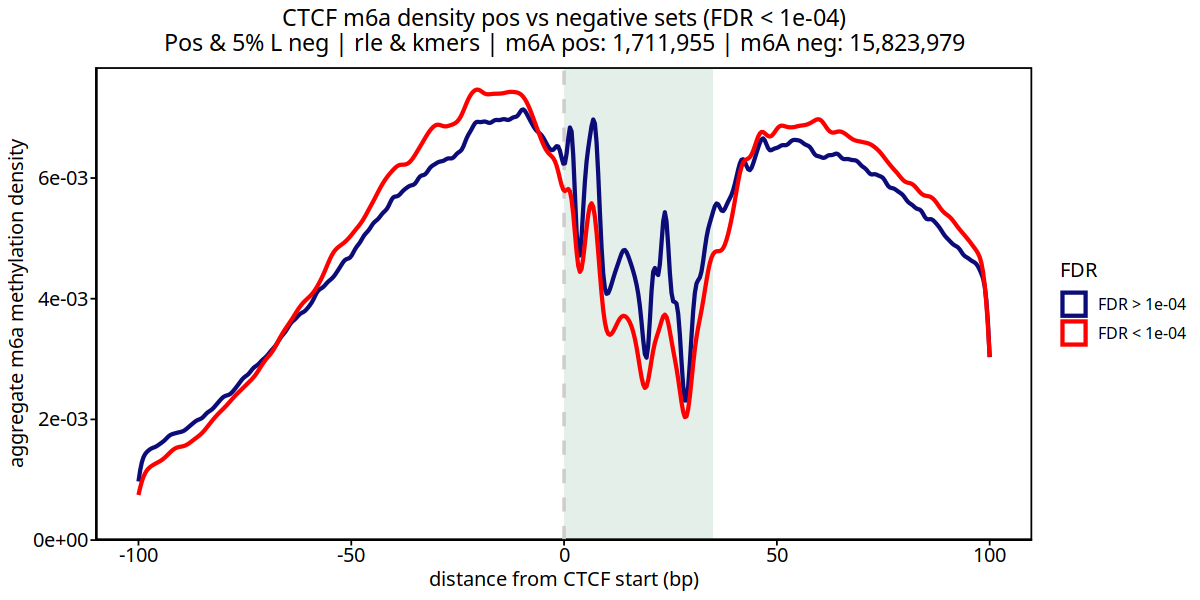

In [128]:
# define colors (light grey, purple, darker grey, blue)
vline_col <- "#CECDCC"
m6a_col <- "#7F3F98"
fiber_col <- "#D1D2D4"
motif_annot_col <- "#006738"#"#6C9272"#"blue"
# colors from Mitchell's presentation (orange, red, purple, light grey, navy (gene track))
mitch_cols <- c("#FF8C00", "#FF0000", "#9370DB", "#E6E6E6", "#0C0C78")
# neg, high m6A & no TF: blue | pos, no m6A & TF: red
color_vals <- c(mitch_cols[5], mitch_cols[2])

# set plot size
options(repr.plot.width=pdf_dims[1], repr.plot.height=pdf_dims[2])


p <- ggplot(pos, aes(x=centered_start, group=FDR_0001)) +
    # add box over motif location
    annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.1, fill=motif_annot_col) +
    # add vertical line at x=0
    geom_vline(xintercept=0, color="#CECDCC", show.legend=FALSE, linetype="dashed", linewidth=1) +
    # density plot
    geom_density(aes(col=FDR_0001), size=1.2, adjust=0.5) +
    scale_color_manual(name="FDR", values=color_vals, labels=legend_labels) +
    scale_y_continuous(limits=c(0, NA), expand=expansion(mult=c(0,0.05)), name=y_axis_name,
                       labels = function(x) format(x, scientific=TRUE), guide=guide_axis(check.overlap=TRUE)) +
    ggtitle(plot_title) +
    scale_x_continuous(name=x_axis_name) +
    theme_classic() +
    theme(text = font_info,
          axis.ticks = element_line(color="#000000", lineend="square"),
          axis.text = font_info,
          panel.background = element_rect(fill="transparent", color="#000000", size=1),
          plot.title = element_text(family="ArialMT", size=font_size+2, hjust=0.5))
p

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])
}

## per fiber m6a plots

In [11]:
# change plot dimensions
options(repr.plot.width=20, repr.plot.height=10)

set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }
set_plot_dimensions(15, 7.5)

In [12]:
res <- df

In [13]:
#------------ Example motif data ------------

# load data file
data_file_name <- "CTCF_m6a_fiberseq_100bp_fig_example_positive.txt"
data_file <- sprintf("%s/%s", data_folder, data_file_name)
print(data_file)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/candidate_footprints/CTCF_m6a_fiberseq_100bp_fig_example_positive.txt"


In [14]:
# read table
df <- fread(data_file)
dim(df)

[1] 2165   13

In [15]:
# add motif_name row
df$motif_name <- paste(df$chrom, df$centering_position, df$strand, sep="_")
# move motif_name to first column
df <- df %>%
    select("motif_name", everything())

# add motif_query column
df <- cbind(paste(df$motif_name, df$query_name, sep="/"), df)
# rename column
colnames(df)[1] = "motif_query"

In [16]:
# get only m6a & msp rows
df <- df[df$centered_position_type %in% c("m6a", "msp")]
dim(df)

[1] 2054   15

In [17]:
# get only instances with motifs within an msp
df <- df %>%
        group_by(chrom, centering_position, strand, query_name) %>%
        filter(any(centered_position_type == "msp" & centered_start <= 0 & centered_end >= 35))
dim(df)

[1] 1878   15

In [18]:
# get only m6a instances
df <- filter(df, centered_position_type == "m6a")

In [19]:
moka <- filter(res, motif_query %in% df$motif_query)
dim(moka)

[1] 1829   22

In [74]:
# plot m6a instances in coords
motif_coords <- c("chr20", 63786415, 63786450)

In [31]:
# create density plot
font_size <- 12
font_info <- element_text(size=font_size, family="ArialMT", color="black")

#### all purple

In [378]:
# make plotting data
df_p <- moka[, c("motif_query", "motif_name", "query_name", "centered_start", "centered_end", "FDR")]

In [219]:
# sort rows by similarity

# create vector of 0s for m6a positions
df_m6a <- data.frame(matrix(0, ncol = 49, nrow = 201))
colnames(df_m6a) <- unique(df_p$query_name)
rownames(df_m6a) <- 1:nrow(df_m6a)

for (name in unique(df_p$query_name)) {
    # add 101 to positions to make them positive & match index
    m6a_positions <- df_p[df_p$query_name == name]$centered_start + 101
    x <- numeric(201)
    x[m6a_positions] <- 1
    df_m6a[name] <- x
}

unsorted_df <- t(df_m6a)
N <- nrow(unsorted_df)
same1 <- function(x, y) sum((x+y) == 2, na.rm=TRUE)
df_list <- unlist(apply(unsorted_df, 1, list),F,F)
df_combos <- which(upper.tri(matrix(NA, nrow=N, ncol=N)),arr.ind=T) #expand.grid(1:length(df_list),1:length(df_list))
commonality <- mapply(same1, df_list[df_combos[,1]], df_list[df_combos[,2]])
best_match <- c()
for(i in 1:length(df_list)){
    best_match[i] <- max(commonality[apply(df_combos,1,function(x)i%in%x)])
}

sorted_df <- unsorted_df[order(best_match, decreasing=TRUE),]
sorted_fibers <- rownames(sorted_df)

# sort by similarity
#df_p <- df_p %>% arrange(factor(query_name, levels=sorted_fibers))
df_p$query_name <- factor(df_p$query_name, levels=sorted_fibers)
df_p <- df_p[order(df_p$query_name)]

In [221]:
#------------ Set output file ------------
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_per_fiber_uncolored.pdf", file_root)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file
save_pdf <- TRUE
pdf_dims <- c(10,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/figures/CTCF_100bp_L_rle_kmer.mokapot.m6a_per_fiber_uncolored.pdf"


In [222]:
# add col with y-axis coords
y_min <- seq(from=0, by=1, length.out=length(unique(df_p$query_name)))
y_max <- seq(from=0.75, by=1, length.out=length(unique(df_p$query_name)))

y_min_vals <- setNames(y_min, unique(df_p$query_name))
y_max_vals <- setNames(y_max, unique(moka$query_name))

df_p <- df_p %>%
            mutate(
                y_min = y_min_vals[query_name],
                y_max = y_max_vals[query_name]
            )
dim(df_p)

[1] 1829    8

In [223]:
# set y-lim
y_limits <- c(0, NA)#round_any(max(density(df$centered_start)$y)*1.2, 0.001, f=ceiling))
x_limits <- c(-100, 100)

plot_title <- sprintf("m6A methylation per fiber [%s: %s-%s]\n%s | rle & kmers", 
                      motif_coords[1],
                      format(motif_coords[2], big.mark=",", scientific=FALSE),
                      format(motif_coords[3], big.mark=",", scientific=FALSE),  
                      "Pos & 5% L neg")
x_axis_name <- "distance from CTCF start (bp)"
y_axis_name <- sprintf("%s fibers", length(unique(df_p$query_name)))
#legend_labels <- c(sprintf("FDR > %s", FDR), sprintf("FDR < %s", FDR))

In [215]:
# define colors (light grey, purple, darker grey, blue)
vline_col <- "#CECDCC"
m6a_col <- "#7F3F98"
fiber_col <- "#D1D2D4"
motif_annot_col <- "#006738"#"#6C9272"#"blue"
# colors from Mitchell's presentation (orange, red, purple, light grey, navy (gene track))
mitch_cols <- c("#FF8C00", "#FF0000", "#9370DB", "#E6E6E6", "#0C0C78")
# neg, high m6A & no TF: blue | pos, no m6A & TF: red
color_vals <- c(mitch_cols[5], mitch_cols[2])

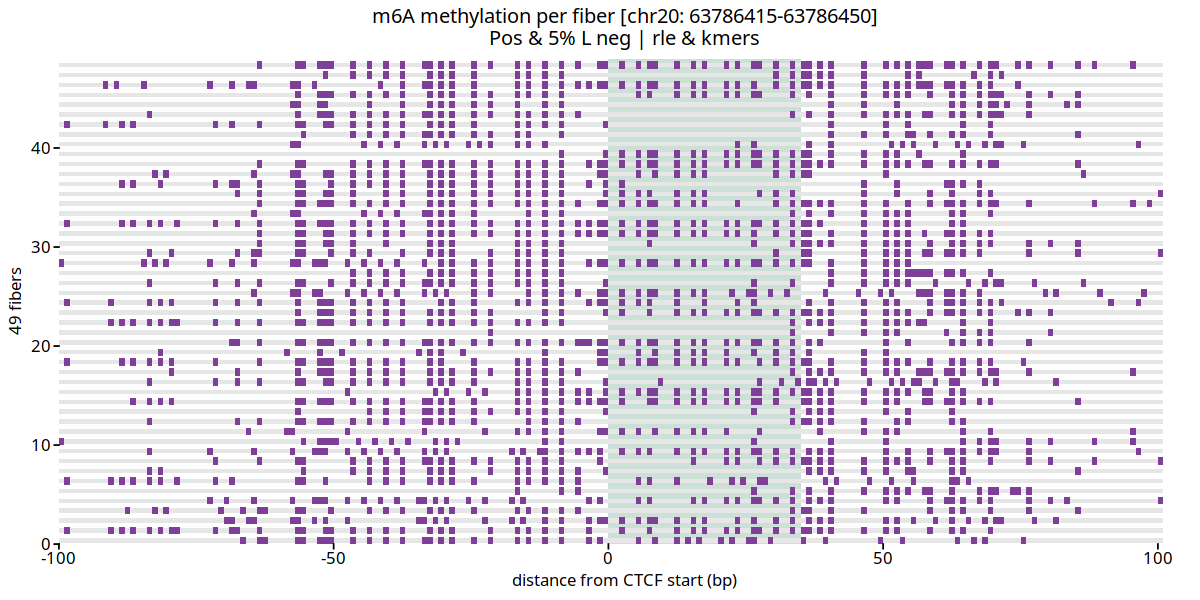

In [224]:
if (save_pdf == TRUE) {set_plot_dimensions(pdf_dims[1], pdf_dims[2])}

# make background fiber smaller than m6a mark
squish_fiber <- 0.15

p <- ggplot(df_p) +
    # add box over motif location
        annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.2, fill=motif_annot_col) +
        geom_rect(aes(xmin=-100, xmax=101, ymin=(y_min+squish_fiber), ymax=(y_max-squish_fiber)), fill=mitch_cols[4], data=df_p) +
        geom_rect(aes(xmin=centered_start, xmax=centered_end, ymin=y_min, ymax=y_max), fill=m6a_col, data=df_p) +
        scale_y_continuous(limits=c(0, 49), expand=expansion(add=c(0,0)), name=y_axis_name) +
        ggtitle(plot_title) +
        scale_x_continuous(name=x_axis_name, expand=expansion(add=c(0, 5))) +
        theme_classic() +
            theme(text = font_info,
            axis.ticks = element_line(color="#000000", lineend="square"),
            axis.text = font_info,
            axis.line = element_blank(),
            panel.background = element_blank(),
            plot.title = element_text(family="ArialMT", size=12, hjust=0.5),
            legend.position = "none")

p

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])
}

##### purple & sorted

In [225]:
#------------ Set output file ------------
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_per_fiber_uncolored_FDR_sorted.pdf", file_root)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file?
save_pdf <- TRUE
pdf_dims <- c(10,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/figures/CTCF_100bp_L_rle_kmer.mokapot.m6a_per_fiber_uncolored_FDR_sorted.pdf"


In [192]:
# set plot parameters
plot_title <- sprintf("(%s) m6a instances per fiber (%s) over %s: %s-%s",
                      "Pos & 5% L neg", length(unique(df_p$query_name)), motif_coords[1], motif_coords[2], motif_coords[3])
x_axis_name <- "area surrounding motif (bp)"
y_axis_name <- sprintf("%s fibers", length(unique(df_p$query_name)))
font_size <- 10
font_info <- element_text(size=font_size, family="ArialMT", color="black")

# grey
vline_col <- "#CECDCC"
# purple
m6a_col <- "#7F3F98"
# gray
fiber_col <- "#D1D2D4"

# colors from Mitchell's presentation
# orange, red, purple, light grey, navy (gene track)
mitch_cols <- c("#FF8C00", "#FF0000", "#9370DB", "#E6E6E6", "#0C0C78")

In [190]:
# add color based on FDR value
# purple, red
fill_cols <- c(m6a_col, m6a_col)

df_p$fill_col <- ifelse(df_p$FDR <= FDR, fill_cols[1], fill_cols[2])
df_p$FDR_group <- ifelse(df_p$FDR <= FDR, "low_FDR", "high_FDR")

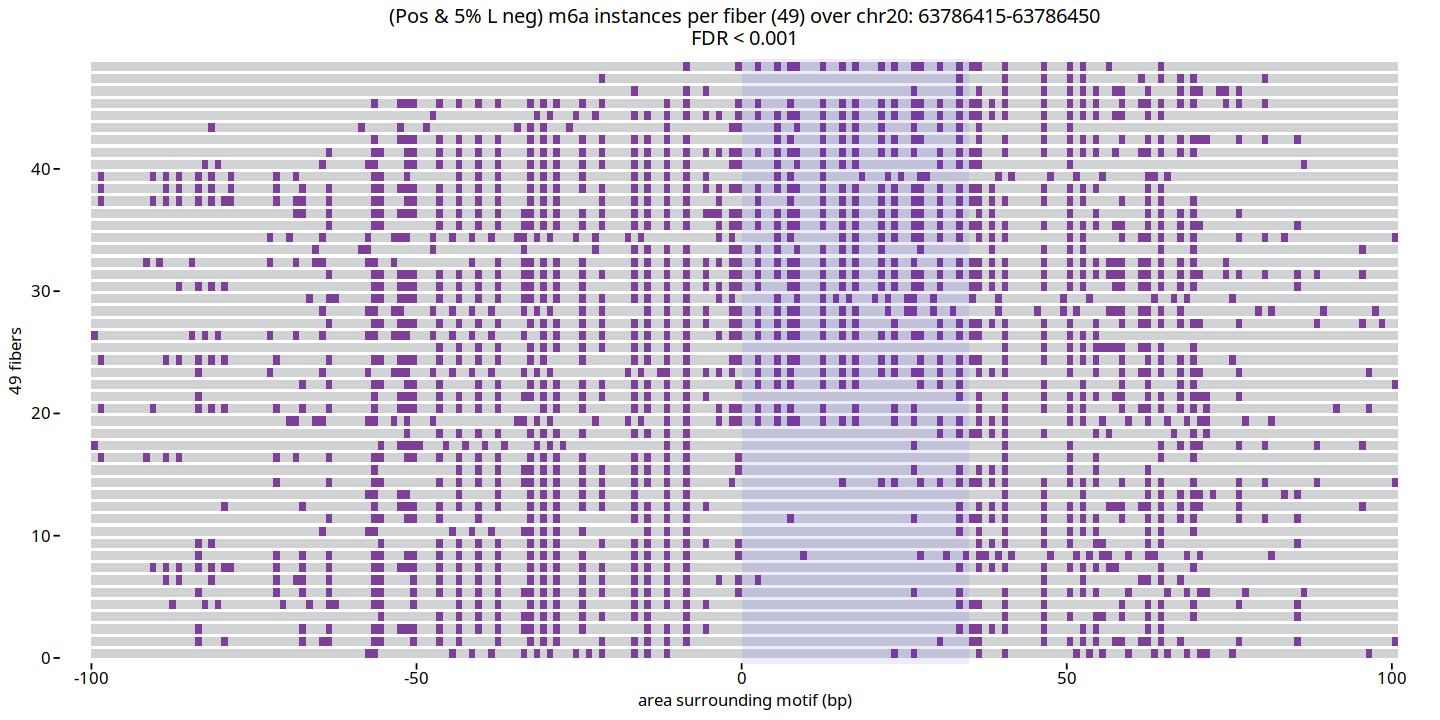

In [191]:
# plot (colored by FDR)

p <- ggplot(df_p) +
        geom_rect(aes(xmin=x_min, xmax=x_max, ymin=y_min, ymax=y_max), fill=fiber_col, data=df_fiber) +
        geom_rect(aes(xmin=centered_start, xmax=centered_end, ymin=y_min, ymax=y_max, group=FDR_group), fill=df_p$fill_col, data=df_p) +
        scale_color_identity() +
        # add box over motif location
        annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.075, fill="blue") +
        scale_y_continuous(limits=c(0, 49), expand=expansion(add=c(0.5,0)), name=y_axis_name) +
        ggtitle(plot_title) +
        scale_x_continuous(name=x_axis_name, expand=expansion(add=c(5, 5))) +
        theme_classic() +
            theme(text = font_info,
            axis.ticks = element_line(color="#000000", lineend="square"),
            axis.text = font_info,
            axis.line = element_blank(),
            panel.background = element_blank(),
            plot.title = element_text(family="ArialMT", size=12, hjust=0.5),
            legend.position = "none")
p

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])
}

### colored by FDR

#### FDR gradient

In [81]:
# make plotting data
df_p <- moka[, c("motif_query", "motif_name", "query_name", "centered_start", "centered_end", "FDR")]
     

In [82]:
#------------ Set output file ------------
FDR <- 0.05
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_per_fiber_log2_FDR.pdf", file_root)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file
save_pdf <- TRUE
pdf_dims <- c(15,6)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/figures/CTCF_100bp_L_rle_kmer.mokapot.m6a_per_fiber_log2_FDR.pdf"


In [83]:
# sort by FDR value
df_p <- df_p[order(df_p$FDR, decreasing=TRUE)]

# add col with y-axis coords
y_min <- seq(from=0, by=1, length.out=length(unique(df_p$query_name)))
y_max <- seq(from=0.75, by=1, length.out=length(unique(df_p$query_name)))

y_min_vals <- setNames(y_min, unique(df_p$query_name))
y_max_vals <- setNames(y_max, unique(df_p$query_name))

df_p <- df_p %>%
            mutate(
                y_min = y_min_vals[query_name],
                y_max = y_max_vals[query_name]
            )

# get plot limits
x_min <- max(df_p$centered_start)
x_max <- min(df_p$centered_end)
# number of fibers
n_fibers <- length(unique(df_p$query_name))

In [85]:
# define colors (light grey, purple, darker grey, blue)
vline_col <- "#CECDCC"
m6a_col <- "#7F3F98"
fiber_col <- "#D1D2D4"
motif_annot_col <- "#006738"#"#6C9272"#"blue"

# colors from Mitchell's presentation (orange, red, purple, light grey, navy (gene track))
mitch_cols <- c("#FF8C00", "#FF0000", "#9370DB", "#E6E6E6", "#0C0C78")
# neg, high m6A & no TF: blue | pos, no m6A & TF: red
color_vals <- c(mitch_cols[2], mitch_cols[5])

# add color based on FDR value
df_p$fill_col <- ifelse(df_p$FDR <= FDR, color_vals[1], color_vals[2])
df_p$FDR_group <- ifelse(df_p$FDR <= FDR, "low_FDR", "high_FDR")

In [88]:
# make plot & axes titles
y_limits <- c(0, NA)
x_limits <- c(-100, 100)
plot_title <- sprintf("m6A methylation per fiber over %s: %s - %s (log2 FDR)\n%s | rle & kmers", 
                      motif_coords[1],
                      format(as.numeric(motif_coords[2]), big.mark=",", scientific=FALSE),
                      format(as.numeric(motif_coords[3]), big.mark=",", scientific=FALSE),
                      "Pos & 5% L neg")
x_axis_name <- "distance from CTCF start (bp)"
y_axis_name <- sprintf("%s fibers", length(unique(df_p$query_name)))
#legend_labels <- c(sprintf("FDR > %s", FDR), sprintf("FDR < %s", FDR))

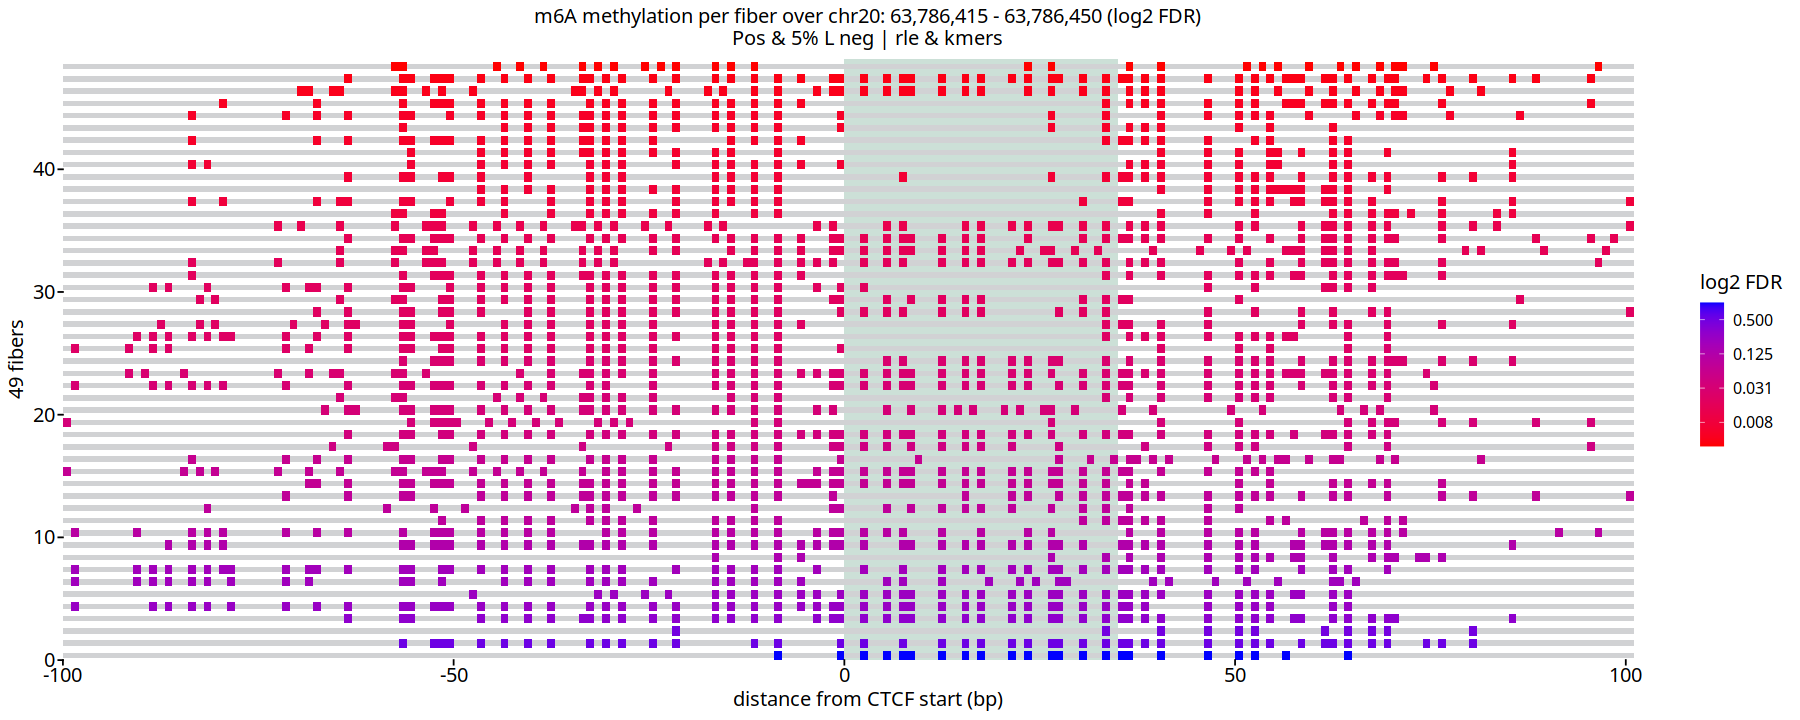

In [89]:
if (save_pdf == TRUE) {set_plot_dimensions(pdf_dims[1], pdf_dims[2])} else {set_plot_dimensions(15, 5)}

# make background fiber smaller than m6a mark
squish_fiber <- 0.15

# colors from Mitchell's presentation (orange, red, purple, light grey, navy (gene track))
mitch_cols <- c("#FF8C00", "#FF0000", "#9370DB", "#E6E6E6", "#0C0C78")
# neg, high m6A & no TF: blue | pos, no m6A & TF: red
color_vals <- c(mitch_cols[2], mitch_cols[5])

# plot (colored by FDR)
p <- ggplot(df_p) +
        # add box over motif location
        annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.2, fill=motif_annot_col) +
        geom_rect(aes(xmin=-100, xmax=101, ymin=(y_min+squish_fiber), ymax=(y_max-squish_fiber)), fill=fiber_col, data=df_p) +
        geom_rect(aes(xmin=centered_start, xmax=centered_end, ymin=y_min, ymax=y_max, group=FDR_group, fill=FDR), data=df_p) +
        scale_fill_gradient(low="red", high="blue", trans="log2", expand = expansion(mult=c(0.5, 0.5)), n.breaks=5,
                            guide=guide_colorbar(barwidth=1, draw.ulim=TRUE, draw.llim=TRUE, title="log2 FDR"),
                            labels=function(x) format(round(x, 3), nsmall=2, scientific=FALSE),) +
        ggtitle(plot_title) +
        scale_y_continuous(limits=c(0, 49), expand=expansion(add=c(0,0)), name=y_axis_name) +
        scale_x_continuous(name=x_axis_name, expand=expansion(add=c(0, 5))) +
        theme_classic() +
            theme(text = font_info,
            axis.ticks = element_line(color="#000000", lineend="square"),
            axis.text = font_info,
            axis.line = element_blank(),
            panel.background = element_blank(),
            plot.title = element_text(family="ArialMT", size=12, hjust=0.5))
p

if (save_pdf == TRUE) {ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])}

#### FDR < 0.05

In [90]:
#------------ Set output file ------------
FDR <- 0.05
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_per_fiber_FDR_%s.pdf", file_root, FDR)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file
save_pdf <- TRUE
pdf_dims <- c(15,6)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/figures/CTCF_100bp_L_rle_kmer.mokapot.m6a_per_fiber_FDR_0.05.pdf"


In [91]:
# make plotting data
df_p <- moka[, c("motif_query", "motif_name", "query_name", "centered_start", "centered_end", "FDR")]
     

In [92]:
# sort by FDR value
df_p <- df_p[order(df_p$FDR, decreasing=TRUE)]

# add col with y-axis coords
y_min <- seq(from=0, by=1, length.out=length(unique(df_p$query_name)))
y_max <- seq(from=0.75, by=1, length.out=length(unique(df_p$query_name)))

y_min_vals <- setNames(y_min, unique(df_p$query_name))
y_max_vals <- setNames(y_max, unique(df_p$query_name))

df_p <- df_p %>%
            mutate(
                y_min = y_min_vals[query_name],
                y_max = y_max_vals[query_name]
            )

# get plot limits
x_min <- max(df_p$centered_start)
x_max <- min(df_p$centered_end)
# number of fibers
n_fibers <- length(unique(df_p$query_name))

In [93]:
# colors from Mitchell's presentation (orange, red, purple, light grey, navy (gene track))
mitch_cols <- c("#FF8C00", "#FF0000", "#9370DB", "#E6E6E6", "#0C0C78")
# neg, high m6A & no TF: blue | pos, no m6A & TF: red
color_vals <- c(mitch_cols[2], mitch_cols[5])

# add color based on FDR value
df_p$fill_col <- ifelse(df_p$FDR <= FDR, color_vals[1], color_vals[2])
df_p$FDR_group <- ifelse(df_p$FDR <= FDR, "low_FDR", "high_FDR")

In [94]:
# make plot & axes titles
y_limits <- c(0, NA)
x_limits <- c(-100, 100)
plot_title <- sprintf("FDR sorted m6A methylation per fiber over %s: %s - %s (FDR < %s)\n%s | rle & kmers | FDR < %s: %s | FDR > %s: %s", 
                      motif_coords[1],
                      format(as.numeric(motif_coords[2]), big.mark=",", scientific=FALSE),
                      format(as.numeric(motif_coords[3]), big.mark=",", scientific=FALSE),
                      FDR, "Pos & 5% L neg", FDR,
                      format(table(df_p$FDR_group)["low_FDR"], big.mark=",", scientific=FALSE), FDR,
                      format(table(df_p$FDR_group)["high_FDR"], big.mark=",", scientific=FALSE))
x_axis_name <- "distance from CTCF start (bp)"
y_axis_name <- sprintf("%s fibers", length(unique(df_p$query_name)))
#legend_labels <- c(sprintf("FDR > %s", FDR), sprintf("FDR < %s", FDR))

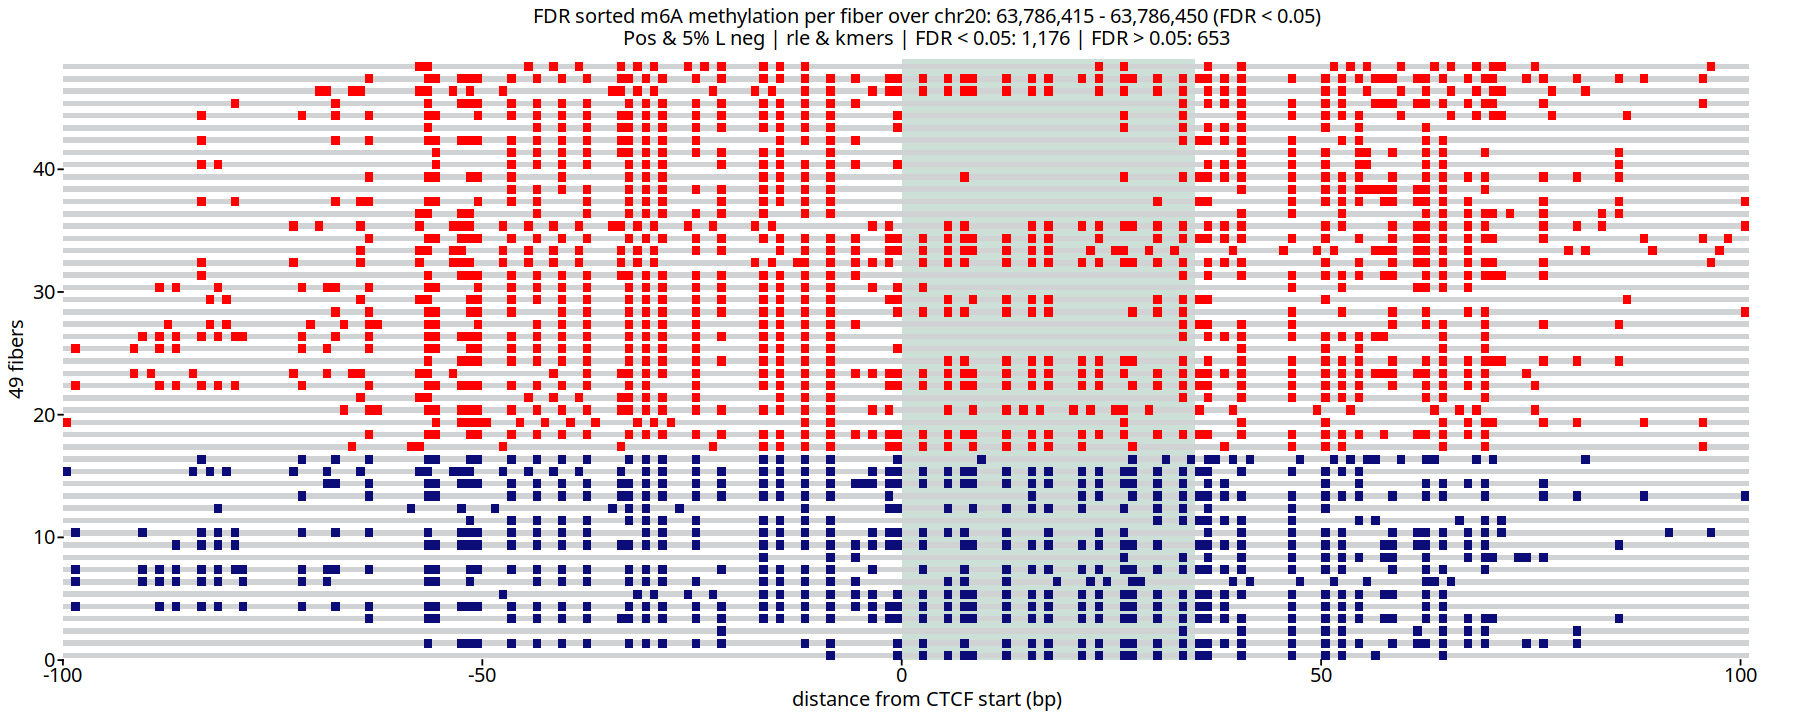

In [95]:
if (save_pdf == TRUE) {set_plot_dimensions(pdf_dims[1], pdf_dims[2])} else {set_plot_dimensions(15, 5)}

# make background fiber smaller than m6a mark
squish_fiber <- 0.15

# colors from Mitchell's presentation (orange, red, purple, light grey, navy (gene track))
mitch_cols <- c("#FF8C00", "#FF0000", "#9370DB", "#E6E6E6", "#0C0C78")
# neg, high m6A & no TF: blue | pos, no m6A & TF: red
color_vals <- c(mitch_cols[2], mitch_cols[5])

# plot (colored by FDR)
p <- ggplot(df_p) +
        # add box over motif location
        annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.2, fill=motif_annot_col) +
        geom_rect(aes(xmin=-100, xmax=101, ymin=(y_min+squish_fiber), ymax=(y_max-squish_fiber)), fill=fiber_col, data=df_p) +
        geom_rect(aes(xmin=centered_start, xmax=centered_end, ymin=y_min, ymax=y_max, group=FDR_group), fill=df_p$fill_col, data=df_p) +
        scale_color_identity() +
        ggtitle(plot_title) +
        scale_y_continuous(limits=c(0, 49), expand=expansion(add=c(0,0)), name=y_axis_name) +
        scale_x_continuous(name=x_axis_name, expand=expansion(add=c(0, 5))) +
        theme_classic() +
            theme(text = font_info,
            axis.ticks = element_line(color="#000000", lineend="square"),
            axis.text = font_info,
            axis.line = element_blank(),
            panel.background = element_blank(),
            plot.title = element_text(family="ArialMT", size=12, hjust=0.5))#,
            #legend.position = "none")
p

if (save_pdf == TRUE) {ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])}

#### FDR < 0.01

In [96]:
#------------ Set output file ------------
FDR <- 0.01
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_per_fiber_FDR_%s.pdf", file_root, FDR)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file
save_pdf <- FALSE
pdf_dims <- c(10,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/figures/CTCF_100bp_L_rle_kmer.mokapot.m6a_per_fiber_FDR_0.01.pdf"


In [97]:
# make plotting data
df_p <- moka[, c("motif_query", "motif_name", "query_name", "centered_start", "centered_end", "FDR")]
     

In [98]:
# sort by FDR value (plotting in reverse order for some reason)
df_p <- df_p[order(df_p$FDR, decreasing=TRUE)]

# add col with y-axis coords
y_min <- seq(from=0, by=1, length.out=length(unique(df_p$query_name)))
y_max <- seq(from=0.75, by=1, length.out=length(unique(df_p$query_name)))

y_min_vals <- setNames(y_min, unique(df_p$query_name))
y_max_vals <- setNames(y_max, unique(df_p$query_name))

df_p <- df_p %>%
            mutate(
                y_min = y_min_vals[query_name],
                y_max = y_max_vals[query_name]
            )

# get plot limits
x_min <- max(df_p$centered_start)
x_max <- min(df_p$centered_end)
# number of fibers
n_fibers <- length(unique(df_p$query_name))


In [99]:
# colors from Mitchell's presentation (orange, red, purple, light grey, navy (gene track))
mitch_cols <- c("#FF8C00", "#FF0000", "#9370DB", "#E6E6E6", "#0C0C78")
# neg, high m6A & no TF: blue | pos, no m6A & TF: red
color_vals <- c(mitch_cols[2], mitch_cols[5])

# add color based on FDR value
df_p$fill_col <- ifelse(df_p$FDR <= FDR, color_vals[1], color_vals[2])
df_p$FDR_group <- ifelse(df_p$FDR <= FDR, "low_FDR", "high_FDR")

In [100]:
# make plot & axes titles
y_limits <- c(0, NA)
x_limits <- c(-100, 100)
plot_title <- sprintf("FDR sorted m6A methylation per fiber over %s: %s - %s (FDR < %s)\n%s | rle & kmers | FDR < %s: %s | FDR > %s: %s", 
                      motif_coords[1],
                      format(as.numeric(motif_coords[2]), big.mark=",", scientific=FALSE),
                      format(as.numeric(motif_coords[3]), big.mark=",", scientific=FALSE),
                      FDR, "Pos & 5% L neg", FDR,
                      format(table(df_p$FDR_group)["low_FDR"], big.mark=",", scientific=FALSE), FDR,
                      format(table(df_p$FDR_group)["high_FDR"], big.mark=",", scientific=FALSE))
x_axis_name <- "distance from CTCF start (bp)"
y_axis_name <- sprintf("%s fibers", length(unique(df_p$query_name)))
#legend_labels <- c(sprintf("FDR > %s", FDR), sprintf("FDR < %s", FDR))

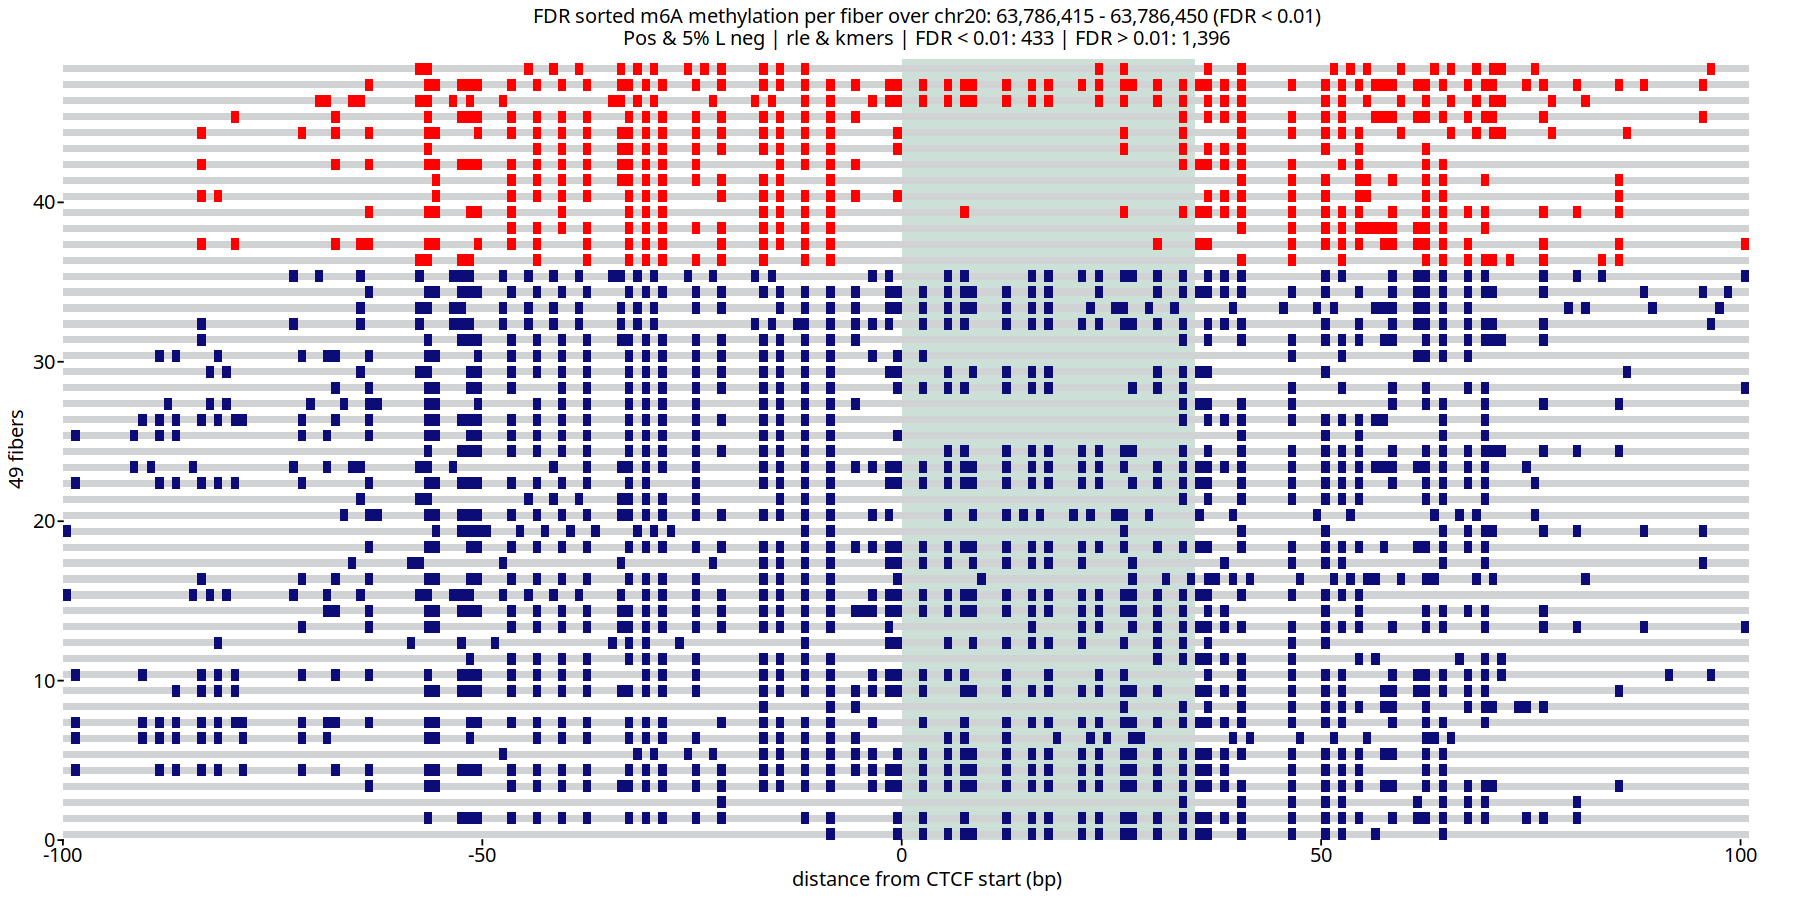

In [101]:
if (save_pdf == TRUE) {set_plot_dimensions(pdf_dims[1], pdf_dims[2])} else {set_plot_dimensions(15, 7.5)}

# make background fiber smaller than m6a mark
squish_fiber <- 0.15

# plot (colored by FDR)
p <- ggplot(df_p) +
        # add box over motif location
        annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.2, fill=motif_annot_col) +
        geom_rect(aes(xmin=-100, xmax=101, ymin=(y_min+squish_fiber), ymax=(y_max-squish_fiber)), fill=fiber_col, data=df_p) +
        geom_rect(aes(xmin=centered_start, xmax=centered_end, ymin=y_min, ymax=y_max, group=FDR_group), fill=df_p$fill_col, data=df_p) +
        scale_fill_identity(guide="legend", labels=c("FDR low", "FDR high")) +

        ggtitle(plot_title) +
        scale_y_continuous(limits=c(0, 49), expand=expansion(add=c(0,0)), name=y_axis_name) +
        scale_x_continuous(name=x_axis_name, expand=expansion(add=c(0, 5))) +
        theme_classic() +
            theme(text = font_info,
            axis.ticks = element_line(color="#000000", lineend="square"),
            axis.text = font_info,
            axis.line = element_blank(),
            panel.background = element_blank(),
            plot.title = element_text(family="ArialMT", size=12, hjust=0.5))
p

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])
}

#### FDR < 0.001

In [61]:
#------------ Set output file ------------
FDR <- 0.001
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_per_fiber_FDR_%s.pdf", file_root, FDR)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file
save_pdf <- FALSE
pdf_dims <- c(10,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/figures/CTCF_100bp_L_rle_kmer.mokapot.m6a_per_fiber_FDR_0.001.pdf"


In [62]:
# make plotting data
df_p <- moka[, c("motif_query", "motif_name", "query_name", "centered_start", "centered_end", "FDR")]
     

In [63]:
# sort by FDR value (plotting in reverse order for some reason)
df_p <- df_p[order(df_p$FDR, decreasing=TRUE)]

# add col with y-axis coords
y_min <- seq(from=0, by=1, length.out=length(unique(df_p$query_name)))
y_max <- seq(from=0.75, by=1, length.out=length(unique(df_p$query_name)))

y_min_vals <- setNames(y_min, unique(df_p$query_name))
y_max_vals <- setNames(y_max, unique(df_p$query_name))

df_p <- df_p %>%
            mutate(
                y_min = y_min_vals[query_name],
                y_max = y_max_vals[query_name]
            )

# get plot limits
x_min <- max(df_p$centered_start)
x_max <- min(df_p$centered_end)
# number of fibers
n_fibers <- length(unique(df_p$query_name))


In [64]:
# make plot & axes titles
y_limits <- c(0, NA)
x_limits <- c(-100, 100)
plot_title <- sprintf("FDR sorted m6A methylation per fiber over %s: %s-%s (FDR < %s)\n%s | rle & kmers | FDR < %s: %s | FDR > %s: %s", 
                      motif_coords[1],
                      format(motif_coords[2], big.mark=",", scientific=FALSE),
                      format(motif_coords[3], big.mark=",", scientific=FALSE),
                      FDR, "Pos & 5% L neg", FDR,
                      format(table(df_p$FDR_group)["low_FDR"], big.mark=",", scientific=FALSE), FDR,
                      format(table(df_p$FDR_group)["high_FDR"], big.mark=",", scientific=FALSE))
x_axis_name <- "distance from CTCF start (bp)"
y_axis_name <- sprintf("%s fibers", length(unique(df_p$query_name)))
#legend_labels <- c(sprintf("FDR > %s", FDR), sprintf("FDR < %s", FDR))

In [65]:
# colors from Mitchell's presentation (orange, red, purple, light grey, navy (gene track))
mitch_cols <- c("#FF8C00", "#FF0000", "#9370DB", "#E6E6E6", "#0C0C78")
# neg, high m6A & no TF: blue | pos, no m6A & TF: red
color_vals <- c(mitch_cols[2], mitch_cols[5])

# add color based on FDR value
df_p$fill_col <- ifelse(df_p$FDR <= FDR, color_vals[1], color_vals[2])
df_p$FDR_group <- ifelse(df_p$FDR <= FDR, "low_FDR", "high_FDR")

In [185]:
# set plot parameters
plot_title <- sprintf("(%s) m6a instances per fiber (%s) over %s: %s-%s\nFDR < %s",
                      "Pos & 5% L neg", length(unique(df_p$query_name)), motif_coords[1], motif_coords[2], motif_coords[3], FDR)
x_axis_name <- "area surrounding motif (bp)"
y_axis_name <- sprintf("%s fibers", length(unique(df_p$query_name)))
font_size <- 10
font_info <- element_text(size=font_size, family="ArialMT", color="black")

# grey
vline_col <- "#CECDCC"
# purple
m6a_col <- "#7F3F98"
# gray
fiber_col <- "#D1D2D4"

# colors from Mitchell's presentation
# orange, red, purple, light grey, navy (gene track)
mitch_cols <- c("#FF8C00", "#FF0000", "#9370DB", "#E6E6E6", "#0C0C78")

In [186]:
# add color based on FDR value
# purple, red
fill_cols <- c(m6a_col, mitch_cols[2])

df_p$fill_col <- ifelse(df_p$FDR <= FDR, fill_cols[1], fill_cols[2])
df_p$FDR_group <- ifelse(df_p$FDR <= FDR, "low_FDR", "high_FDR")

In [187]:
# change plot dimensions
options(repr.plot.width=20, repr.plot.height=10)

set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }

set_plot_dimensions(12, 6)

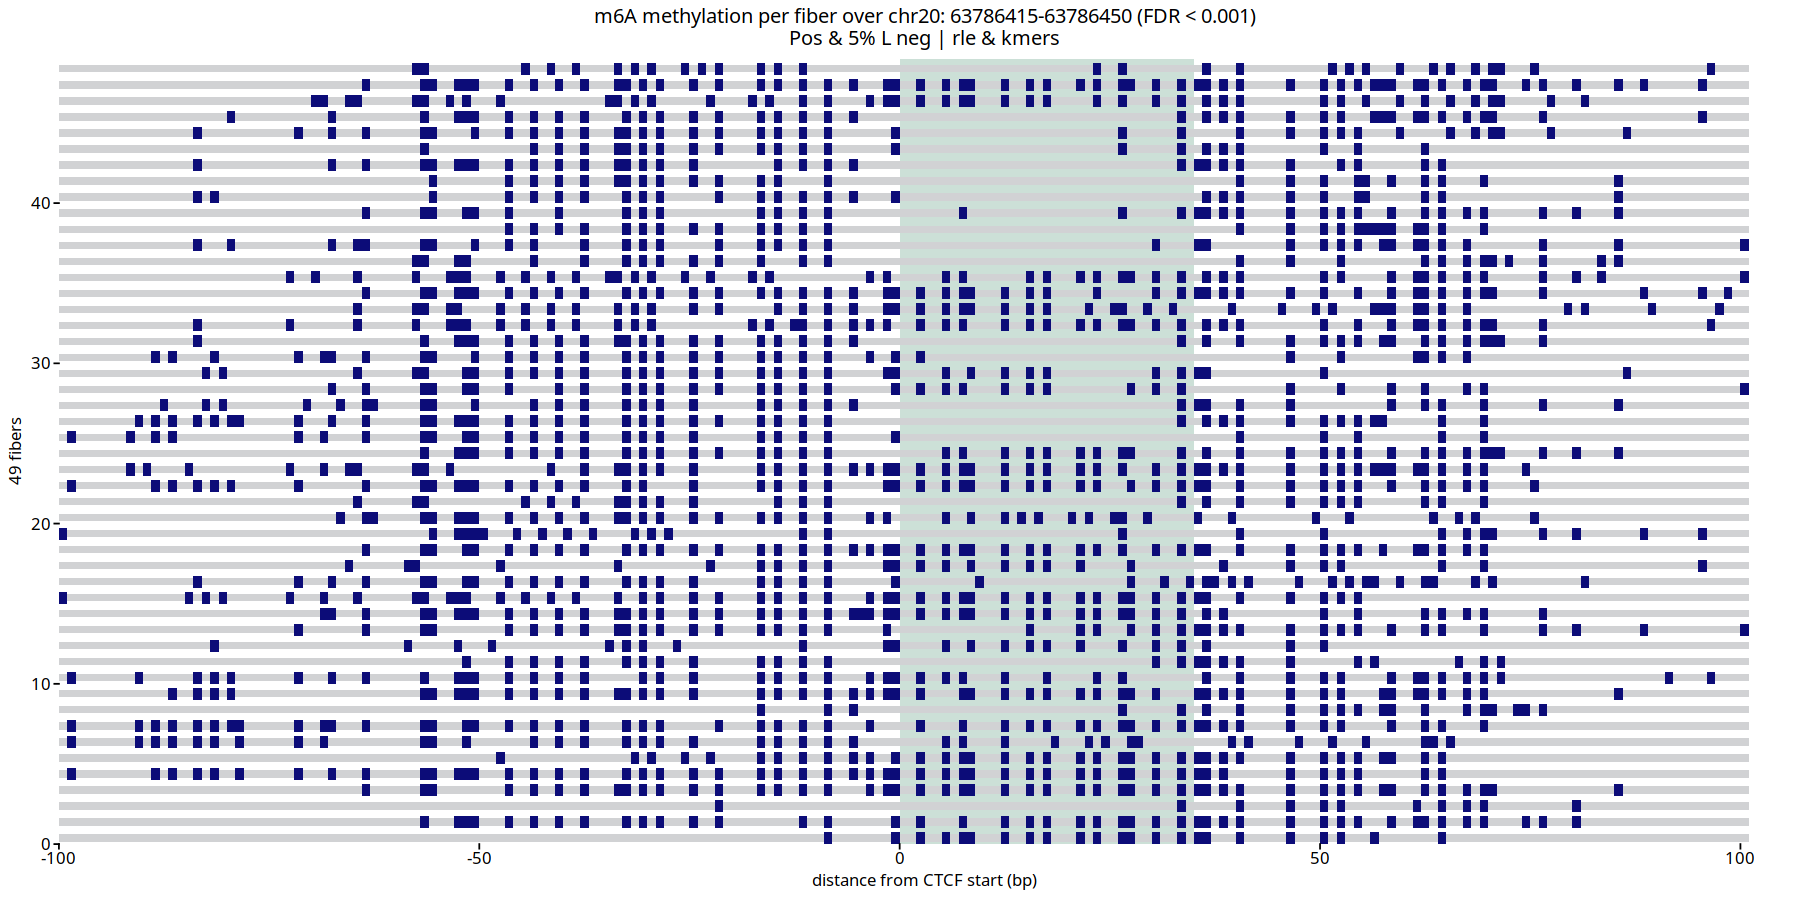

In [321]:
if (save_pdf == TRUE) {set_plot_dimensions(pdf_dims[1], pdf_dims[2])} else {set_plot_dimensions(15, 7.5)}

# make background fiber smaller than m6a mark
squish_fiber <- 0.15

# plot (colored by FDR)
p <- ggplot(df_p) +
        # add box over motif location
        annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.2, fill=motif_annot_col) +
        geom_rect(aes(xmin=-100, xmax=101, ymin=(y_min+squish_fiber), ymax=(y_max-squish_fiber)), fill=fiber_col, data=df_p) +
        geom_rect(aes(xmin=centered_start, xmax=centered_end, ymin=y_min, ymax=y_max, group=FDR_group, fill=fill_col), fill=df_p$fill_col, data=df_p) +
        scale_color_identity() +

        ggtitle(plot_title) +
        scale_y_continuous(limits=c(0, 49), expand=expansion(add=c(0,0)), name=y_axis_name) +
        scale_x_continuous(name=x_axis_name, expand=expansion(add=c(0, 5))) +
        theme_classic() +
            theme(text = font_info,
            axis.ticks = element_line(color="#000000", lineend="square"),
            axis.text = font_info,
            axis.line = element_blank(),
            panel.background = element_blank(),
            plot.title = element_text(family="ArialMT", size=12, hjust=0.5))#,
            #legend.position = "none")
p

if (save_pdf == TRUE) {ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])}